In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

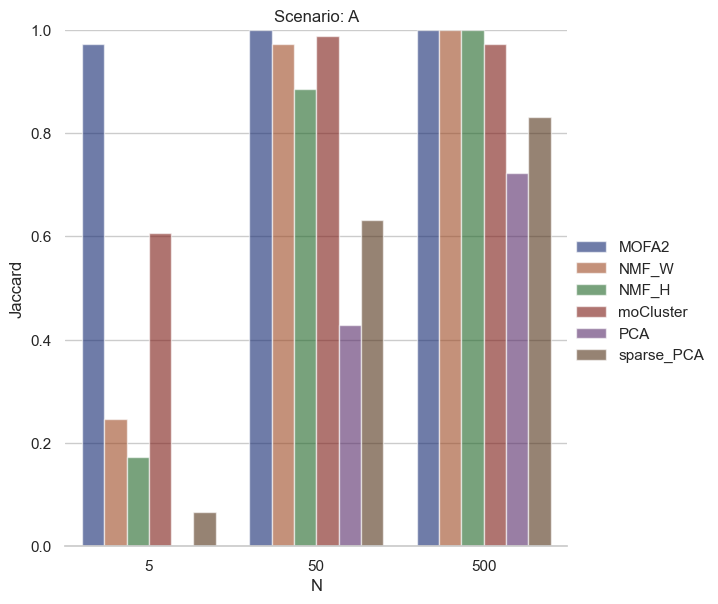

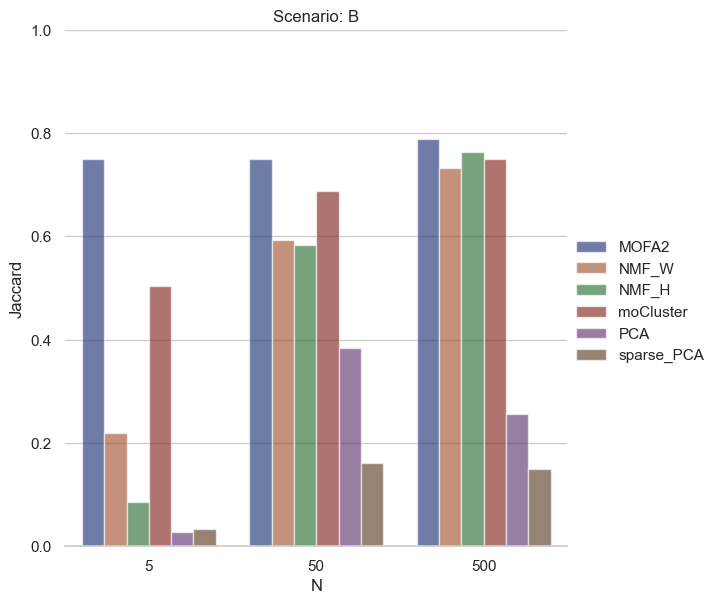

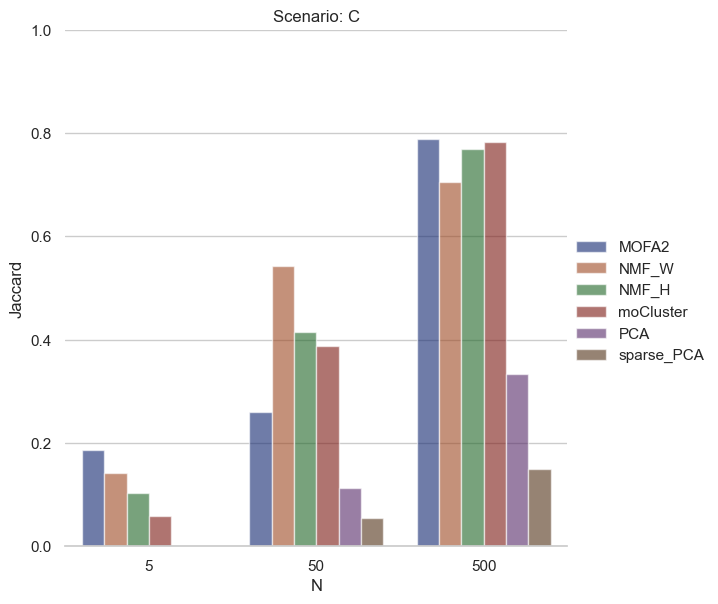

In [4]:
scenarios = ['A', 'B', 'C']
N_LIST = [5, 50, 500]


for scenario in scenarios:
    df_all = pd.DataFrame()
    for N in N_LIST:
        
        df = pd.read_csv(f'simulated/evaluation_{scenario}_{N}.csv', index_col=0)
        df['N'] = N
        
        df_all = pd.concat([df_all, df])
    df_all = df_all.reset_index()
    df_all = df_all.rename(columns={'index':'algorithm'})
    
    hue_order = ['MOFA2', 'NMF_W', 'NMF_H', 'moCluster', 'PCA', 'sparse_PCA']
    # Draw a nested barplot
    g = sns.catplot(
        data=df_all, kind="bar",
        x="N", y="Jaccard", hue="algorithm",
        ci="sd", palette="dark", alpha=.6, height=6, hue_order=hue_order
    )
    g.despine(left=True)
    # g.set_axis_labels("", "Body mass (g)")
    g.legend.set_title("")
    plt.ylim((0,1))
    plt.title(f'Scenario: {scenario}')
    plt.show()

In [7]:
df_all

,algorithm,#cluster,Jaccard,cluster,time (s),N
0,MOFA2,6,0.186703,s...,27.561317,5
1,NMF_W,10,0.142576,s...,25.855407,5
2,NMF_H,5,0.103842,s...,6.623037,5
3,moCluster,7,0.058480,s...,2.061581,5
4,PCA,4,0.000000,s...,0.136821,5
5,sparse_PCA,4,0.000000,s...,68.313520,5
6,NMF_W,8,0.542584,s...,10.814508,50
7,NMF_H,8,0.414144,s...,9.428171,50
8,moCluster,6,0.387179,s...,33.141262,50
9,MOFA2,7,0.259977,s...,21.089660,50


## iClusterPlus

In [38]:
from methods import iClusterPlus
import os

In [39]:
params = iClusterPlus.get_parameters()

In [52]:
file_list = []
for path, subdirs, files in os.walk('iClusterPlusCluster'):
    for name in files:
        file_list.append(os.path.join(path, name))


len(file_list)

782

In [49]:
param_list = [x.split('=') for x in path.split('/') if x.count('=')==1]
param_d = {key: value for key, value in param_list}

In [50]:
param_d

{'lambda_n': '10',
 'n_cluster': '3',
 'lambda_scale': '1',
 'iter_max': '10000',
 'eps': '0.001',
 'type': 'multinomial',
 'burnin_n': '200.0',
 'draw_n': '200.0',
 'sdev': '0.001',
 'seed': '1'}

In [51]:
params

[{'exprs_file': '/local/DESMOND2_data_simulated/simulated/A/A.n_genes=5,m=4,std=1,overlap=no.exprs_z.tsv',
  'lambda_n': '1.0',
  'n_cluster': 4,
  'lambda_scale': 1,
  'iter_max': 10000,
  'eps': 0.001,
  'type': 'gaussian',
  'burnin_n': 10.0,
  'draw_n': 10.0,
  'sdev': 0.001},
 {'exprs_file': '/local/DESMOND2_data_simulated/simulated/A/A.n_genes=5,m=4,std=1,overlap=no.exprs_z.tsv',
  'lambda_n': '1.0',
  'n_cluster': 4,
  'lambda_scale': 1,
  'iter_max': 10000,
  'eps': 0.0007525,
  'type': 'gaussian',
  'burnin_n': 10.0,
  'draw_n': 10.0,
  'sdev': 0.001},
 {'exprs_file': '/local/DESMOND2_data_simulated/simulated/A/A.n_genes=5,m=4,std=1,overlap=no.exprs_z.tsv',
  'lambda_n': '1.0',
  'n_cluster': 4,
  'lambda_scale': 1,
  'iter_max': 10000,
  'eps': 0.000505,
  'type': 'gaussian',
  'burnin_n': 10.0,
  'draw_n': 10.0,
  'sdev': 0.001},
 {'exprs_file': '/local/DESMOND2_data_simulated/simulated/A/A.n_genes=5,m=4,std=1,overlap=no.exprs_z.tsv',
  'lambda_n': '1.0',
  'n_cluster': 4,
 

In [3]:
s = '123'

In [4]:
s.replace('1', 'a')

'a23'